# [Clasificación de texto con Tensorflow](https://www.youtube.com/watch?v=qaBmfCbzOko&list=PL7HAy5R0ehQVdPVLV6pIJA9ZE2vVyLRxX&index=43)

In [2]:
import numpy as np
import pandas as pd
import seaborn as sn
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix

from tensorflow.keras. layers import Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam

In [3]:
# Lee el archivo CSV con el separador correcto y el motor 'python'
df = pd.read_csv('reviews_filmaffinity.csv', sep='\|\|', engine='python')

In [4]:
df

,film_name,gender,film_avg_rate,review_rate,review_title,review_text
0,Ocho apellidos vascos,Comedia,"6,0",3.0,OCHO APELLIDOS VASCOS...Y NINGÚN NOMBRE PROPIO,La mayor virtud de esta película es su existen...
1,Ocho apellidos vascos,Comedia,"6,0",2.0,El perro verde,"No soy un experto cinéfilo, pero pocas veces m..."
2,Ocho apellidos vascos,Comedia,"6,0",2.0,Si no eres de comer mierda... no te comas esta...,Si no eres un incondicional del humor estilo T...
3,Ocho apellidos vascos,Comedia,"6,0",2.0,Aida: The movie,"No sé qué está pasando, si la gente se deja ll..."
4,Ocho apellidos vascos,Comedia,"6,0",2.0,UN HOMBRE SOLO (Julio Iglesias 1987),"""Pero cuando amanece,y me quedo solo,siento en..."
...,...,...,...,...,...,...
8598,La isla mínima,Cine negro,"7,2",10.0,magnífica,"Buena no, lo siguiente. Por fin un film serio ..."
8599,La isla mínima,Cine negro,"7,2",3.0,"Mucho bombo por ser española, pero es igual qu...","Me esperaba mucho, pero que mucho, más.Guión m..."
8600,La isla mínima,Cine negro,"7,2",4.0,¿Quién me quita ahora este mal sabor de boca?,"De mal cuerpo como sensación al finalizar, de ..."
8601,La isla mínima,Cine negro,"7,2",1.0,La isla española,Los que han añadido comentarios os lo han dich...


In [5]:
# Definir la función para asignar la categoría según el valor de review_rate
def asignar_categoria(valor):
    if valor <= 4:
        return "negativo"
    elif valor >= 5 and valor < 7:
        return "neutro"
    else:
        return "positivo"

# Aplicar la función a la columna review_rate para crear la nueva columna Comentario
df['Comentario'] = df['review_rate'].apply(asignar_categoria)

# Mostrar las primeras líneas del DataFrame con la nueva columna Comentario
df

,film_name,gender,film_avg_rate,review_rate,review_title,review_text,Comentario
0,Ocho apellidos vascos,Comedia,"6,0",3.0,OCHO APELLIDOS VASCOS...Y NINGÚN NOMBRE PROPIO,La mayor virtud de esta película es su existen...,negativo
1,Ocho apellidos vascos,Comedia,"6,0",2.0,El perro verde,"No soy un experto cinéfilo, pero pocas veces m...",negativo
2,Ocho apellidos vascos,Comedia,"6,0",2.0,Si no eres de comer mierda... no te comas esta...,Si no eres un incondicional del humor estilo T...,negativo
3,Ocho apellidos vascos,Comedia,"6,0",2.0,Aida: The movie,"No sé qué está pasando, si la gente se deja ll...",negativo
4,Ocho apellidos vascos,Comedia,"6,0",2.0,UN HOMBRE SOLO (Julio Iglesias 1987),"""Pero cuando amanece,y me quedo solo,siento en...",negativo
...,...,...,...,...,...,...,...
8598,La isla mínima,Cine negro,"7,2",10.0,magnífica,"Buena no, lo siguiente. Por fin un film serio ...",positivo
8599,La isla mínima,Cine negro,"7,2",3.0,"Mucho bombo por ser española, pero es igual qu...","Me esperaba mucho, pero que mucho, más.Guión m...",negativo
8600,La isla mínima,Cine negro,"7,2",4.0,¿Quién me quita ahora este mal sabor de boca?,"De mal cuerpo como sensación al finalizar, de ...",negativo
8601,La isla mínima,Cine negro,"7,2",1.0,La isla española,Los que han añadido comentarios os lo han dich...,negativo


In [6]:
df = df[['Comentario', 'review_text']]
df

,Comentario,review_text
0,negativo,La mayor virtud de esta película es su existen...
1,negativo,"No soy un experto cinéfilo, pero pocas veces m..."
2,negativo,Si no eres un incondicional del humor estilo T...
3,negativo,"No sé qué está pasando, si la gente se deja ll..."
4,negativo,"""Pero cuando amanece,y me quedo solo,siento en..."
...,...,...
8598,positivo,"Buena no, lo siguiente. Por fin un film serio ..."
8599,negativo,"Me esperaba mucho, pero que mucho, más.Guión m..."
8600,negativo,"De mal cuerpo como sensación al finalizar, de ..."
8601,negativo,Los que han añadido comentarios os lo han dich...


<Axes: >

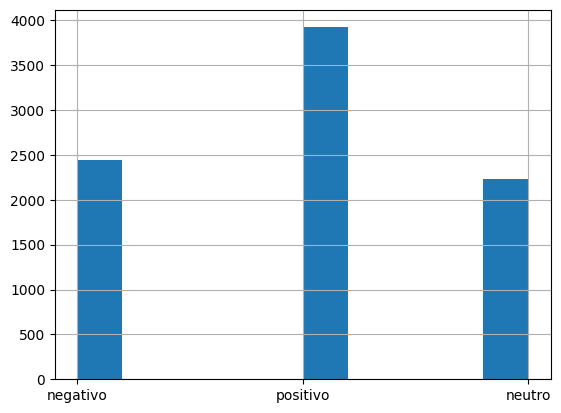

In [7]:
df['Comentario'].hist()

In [8]:
# Descartamos los neutros para el ejercicio
df = df[df['Comentario'] != 'neutro'].copy()

In [20]:
target_map = {'positivo': 1, 'negativo': 0}
df['objetivo'] = df['Comentario'].map(target_map)

In [22]:
df.head(10)

,Comentario,review_text,objetivo
0,negativo,La mayor virtud de esta película es su existen...,0
1,negativo,"No soy un experto cinéfilo, pero pocas veces m...",0
2,negativo,Si no eres un incondicional del humor estilo T...,0
3,negativo,"No sé qué está pasando, si la gente se deja ll...",0
4,negativo,"""Pero cuando amanece,y me quedo solo,siento en...",0
5,positivo,La llegada de Rafa a Euskadi es como ponerse a...,1
6,negativo,El nivel del cine y lo peor la capacidad intel...,0
7,negativo,Es triste ver una película como ésta y escucha...,0
8,negativo,Puedo entender que Torrente I y II y Lo imposi...,0
9,negativo,"-Ahivalohostia, Txomin, qué montón de gente ri...",0


In [24]:
df_train, df_test = train_test_split(df, random_state= 42)

In [26]:
vectorizer = TfidfVectorizer(max_features=2000)
X_train = vectorizer.fit_transform(df_train['review_text'])
X_test = vectorizer.fit_transform(df_test['review_text'])

In [28]:
X_train = X_train.toarray()
X_test = X_test.toarray()

In [30]:
Y_train = df_train['objetivo']
Y_test = df_test['objetivo']

In [32]:
D = X_train.shape[1]

In [34]:
D

2000

In [36]:
i = Input(shape=(D,))
x = Dense(1)(i) # sigmoid included in loss

model = Model(i, x)

In [38]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2000)]            0         
                                                                 
 dense (Dense)               (None, 1)                 2001      
                                                                 
Total params: 2001 (7.82 KB)
Trainable params: 2001 (7.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [40]:
model.compile(
    loss = BinaryCrossentropy(from_logits=True),
    optimizer = Adam(learning_rate=0.01),
    metrics=['accuracy']
)

In [44]:
r = model.fit(
    X_train, Y_train,
    validation_data=(X_test, Y_test),
    epochs= 100,
    batch_size=128,
)

Epoch 1/100
38/38 [==============================] - 1s 8ms/step - loss: 0.6266 - accuracy: 0.6606 - val_loss: 0.6625 - val_accuracy: 0.4545
Epoch 2/100
38/38 [==============================] - 0s 4ms/step - loss: 0.5350 - accuracy: 0.7942 - val_loss: 0.6591 - val_accuracy: 0.5355
Epoch 3/100
38/38 [==============================] - 0s 4ms/step - loss: 0.4761 - accuracy: 0.8375 - val_loss: 0.6598 - val_accuracy: 0.5675
Epoch 4/100
38/38 [==============================] - 0s 4ms/step - loss: 0.4336 - accuracy: 0.8499 - val_loss: 0.6620 - val_accuracy: 0.5593
Epoch 5/100
38/38 [==============================] - 0s 4ms/step - loss: 0.4020 - accuracy: 0.8576 - val_loss: 0.6653 - val_accuracy: 0.5631
Epoch 6/100
38/38 [==============================] - 0s 5ms/step - loss: 0.3765 - accuracy: 0.8685 - val_loss: 0.6702 - val_accuracy: 0.5813
Epoch 7/100
38/38 [==============================] - 0s 4ms/step - loss: 0.3556 - accuracy: 0.8754 - val_loss: 0.6767 - val_accuracy: 0.5976
Epoch 8/100
3

In [46]:
P_train = ((model.predict(X_train) > 0) * 1.0).flatten()
P_test = ((model.predict(X_test) > 0) * 1.0).flatten()

50/50 [==============================] - 0s 2ms/step


In [48]:
cm_train = confusion_matrix(Y_train, P_train, normalize = 'true')
cm_train

array([[0.9776323 , 0.0223677 ],
       [0.01427115, 0.98572885]])

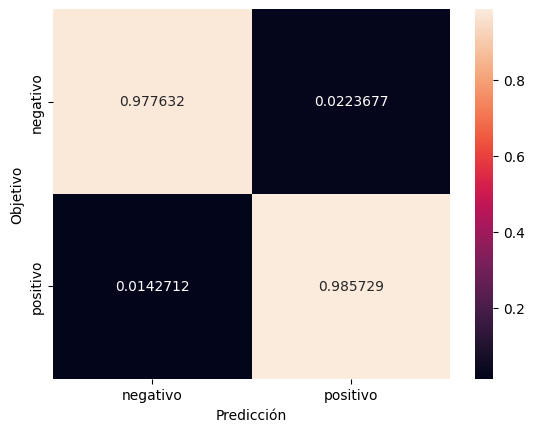

In [52]:
def plot_cm(cm):
    classes = ['negativo', 'positivo']
    df_cm = pd.DataFrame(cm, index=classes, columns=classes)
    ax = sn.heatmap(df_cm, annot=True, fmt='g')
    ax.set_xlabel("Predicción")
    ax.set_ylabel("Objetivo")

plot_cm(cm_train)

In [54]:
Pr_train = model.predict(X_train)
Pr_test = model.predict(X_test)
print ("Train AUC:", roc_auc_score(Y_train, Pr_train))
print("Test AUC:", roc_auc_score(Y_test, Pr_test))

50/50 [==============================] - 0s 2ms/step
Train AUC: 0.9980502432190896
Test AUC: 0.5688530808210199


In [60]:
print("Train F1:", f1_score(Y_train, P_train))
print("Test F1:", f1_score(Y_test, P_test))

Train F1: 0.9858963466440102
Test F1: 0.7069124423963133
